In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [2]:
# importing and reading the data set

dt = pd.read_csv('train.csv')

In [3]:
dt.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
dt.shape

(1460, 81)

## Data Visualization

dividing the data set into numerical and categorical columns to visualize


In [5]:
numeric_data = dt.select_dtypes(include=[np.number])
categorical_data = dt.select_dtypes(exclude=[np.number])

In [6]:
categorical_columns = list(categorical_data.columns)

In [7]:
categorical_data['target_variable'] = dt['SalePrice']
categorical_data

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
13         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
15         RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
16         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
17         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
20         RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
21         RM   Pave  Grvl      Reg         Bnk    AllPub    Inside       Gtl   
22         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
23         RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
24         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
25         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
26         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
27         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
28         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
29         RM   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
30    C (all)   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
31         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
32         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
33         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
34         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
35         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
36         RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
37         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
38         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
39         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
40         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
41         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
42         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
43         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
44         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
45         RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
46         RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
47         FV   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
48         RM   Pave   NaN      Reg 

#### Visualizing the categorical variables

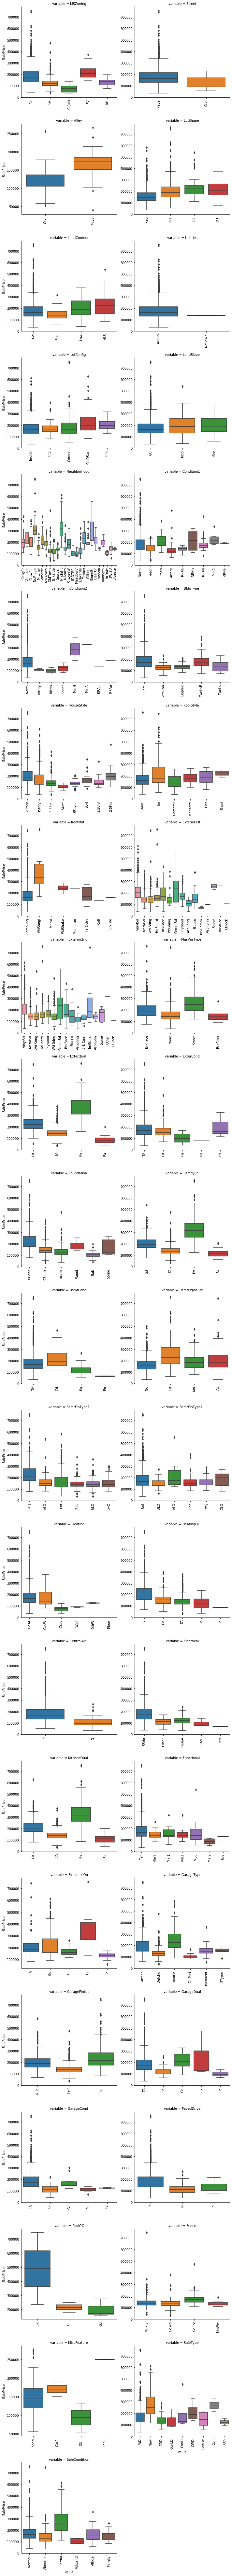

In [8]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(dt, id_vars=['SalePrice'], value_vars=categorical_columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

#### Visualizong the numerical variables distribution

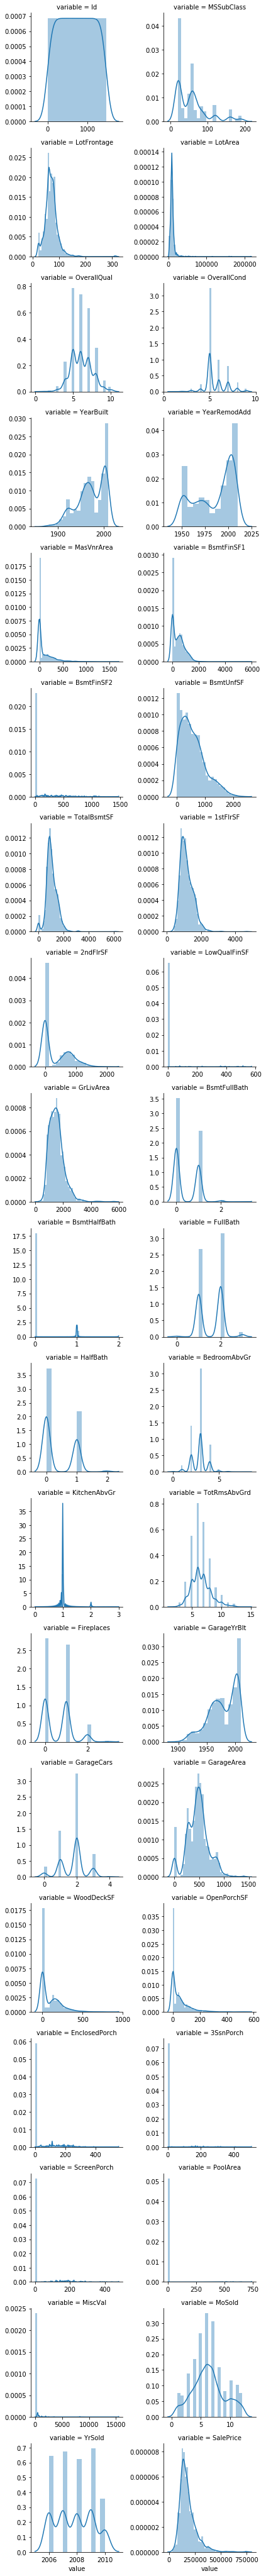

In [9]:
f = pd.melt(dt, value_vars=numeric_data)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

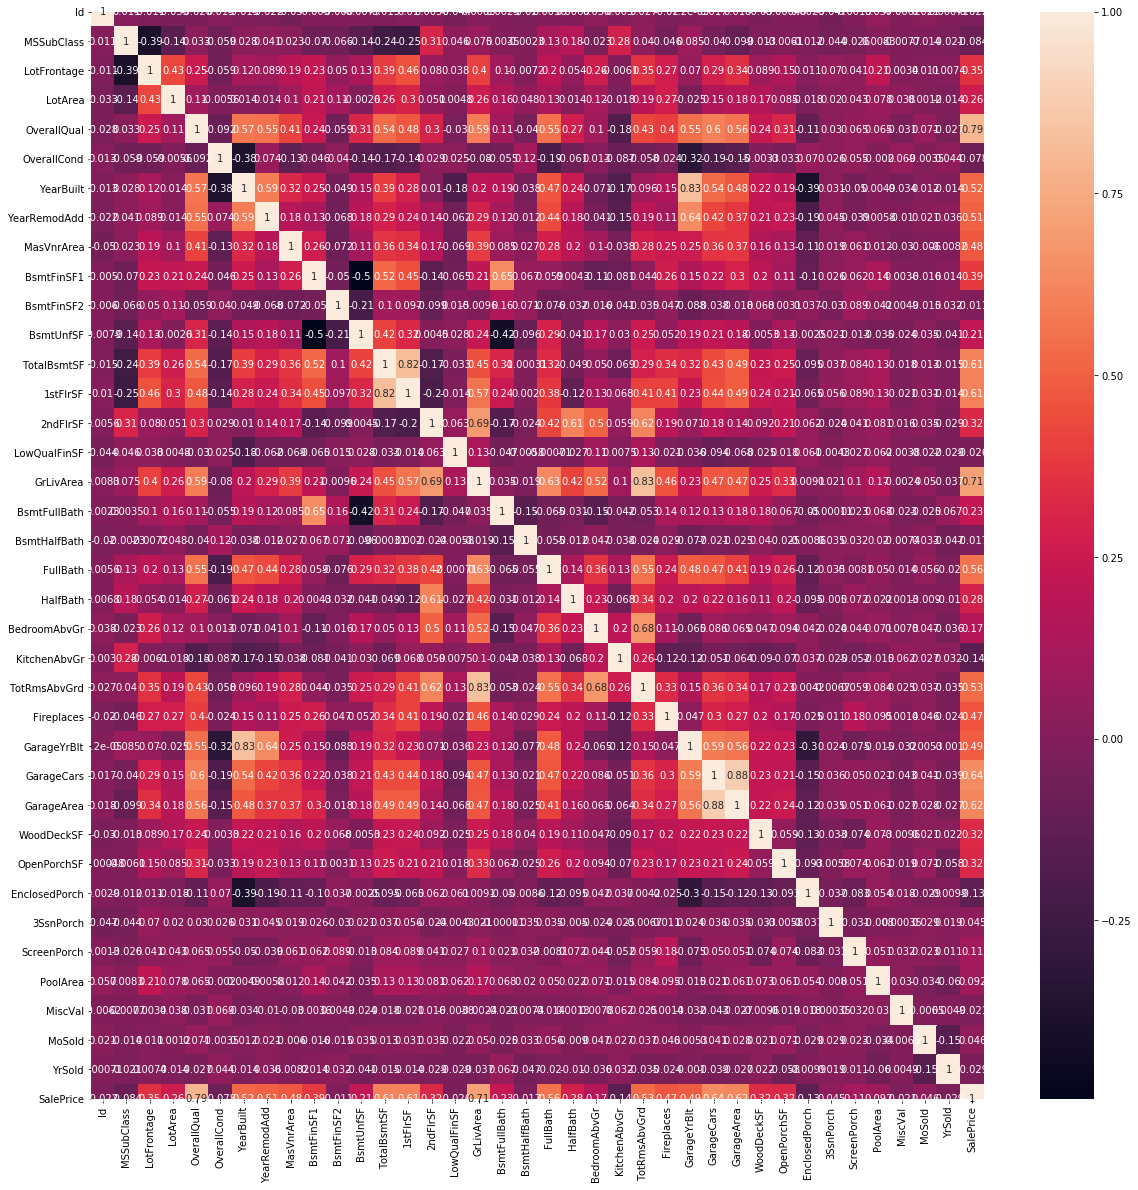

In [10]:
# Checking the correlation between the variables

plt.figure(figsize = (20,20))
sns.heatmap(dt.corr(), annot=True)
plt.show()

### Checking the null values in all columns

In [11]:
dt.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
dt.isnull().sum().sort_values(ascending=False).head(22)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
dtype: int64

In [14]:
dt.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [15]:
dt['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
dt['LotFrontage'].median()

69.0

In [17]:
dt['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
dt['GarageYrBlt'].median()

1980.0

In [19]:
dt['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [20]:
dt['MasVnrArea'].median()

0.0

### Imputing Continuous Variables with Mean

In [21]:
dt.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [22]:
dt.LotFrontage.fillna(dt.LotFrontage.mean(), inplace=True)

In [23]:
dt.GarageYrBlt.describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [24]:
dt.GarageYrBlt.fillna(dt.GarageYrBlt.mean(), inplace=True)

In [25]:
dt.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [26]:
dt.MasVnrArea.fillna(dt.MasVnrArea.mean(), inplace=True)

In [27]:
dt.PoolQC.fillna('No Pool', inplace=True)
dt.MiscFeature.fillna('None', inplace=True)
dt.Alley.fillna('No Alley', inplace=True)
dt.Fence.fillna('No Fence', inplace=True)
dt.FireplaceQu.fillna('No Fireplace', inplace=True)
dt.Electrical.fillna('None', inplace=True)
dt.MasVnrType.fillna('None', inplace=True)
dt.GarageCond.fillna('No Garage', inplace=True)
dt.GarageType.fillna('No Garage', inplace=True)
dt.GarageQual.fillna('No Garage', inplace=True)
dt.GarageFinish.fillna('No Garage', inplace=True)
dt.BsmtExposure.fillna('No Basement', inplace=True)
dt.BsmtQual.fillna('No Basement', inplace=True)
dt.BsmtCond.fillna('No Basement', inplace=True)
dt.BsmtFinType1.fillna('No Basement', inplace=True)
dt.BsmtFinType2.fillna('No Basement', inplace=True)

In [28]:
dt.isnull().sum().sort_values(ascending=False)

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

In [29]:
dt.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave  No Alley      Reg   
1   2          20       RL    80.000000     9600   Pave  No Alley      Reg   
2   3          60       RL    68.000000    11250   Pave  No Alley      IR1   
3   4          70       RL    60.000000     9550   Pave  No Alley      IR1   
4   5          60       RL    84.000000    14260   Pave  No Alley      IR1   
5   6          50       RL    85.000000    14115   Pave  No Alley      IR1   
6   7          20       RL    75.000000    10084   Pave  No Alley      Reg   
7   8          60       RL    70.049958    10382   Pave  No Alley      IR1   
8   9          50       RM    51.000000     6120   Pave  No Alley      Reg   
9  10         190       RL    50.000000     7420   Pave  No Alley      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTi

We have imputed null values with suitable values in all columns

#### mapping ordinal categorical variables with numbers

In [30]:
MSZoning_new = {'A':'Agriculture', 'C (all)':'Commercial', 'FV':'Floating Village Residential', 'I':'Industrial', 
                'RH':'Residential High Density', 'RL':'Residential Low Density', 'RP':'Residential Low Density Park', 
                'RM':'Residential Medium Density'}
dt['MSZoning'] = dt['MSZoning'].map(MSZoning_new)

LotShape_new = {'Reg':4, 'IR1':3, 'IR2':2, 'IR3':1}
dt['LotShape'] = dt['LotShape'].map(LotShape_new)

LandContour_new = {'Lvl':4, 'Bnk':3, 'HLS':2, 'Low':1}
dt['LandContour'] = dt['LandContour'].map(LandContour_new)

Utilities_new = {'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}
dt['Utilities'] = dt['Utilities'].map(Utilities_new)

LandSlope_new = {'Gtl':3, 'Mod':2, 'Sev':1}
dt['LandSlope'] = dt['LandSlope'].map(LandSlope_new)

ExterQual_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dt['ExterQual'] = dt['ExterQual'].map(ExterQual_new)

ExterCond_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dt['ExterCond'] = dt['ExterCond'].map(ExterCond_new)

BsmtQual_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0}
dt['BsmtQual'] =  dt['BsmtQual'].map(BsmtQual_new)

BsmtCond_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Basement':0}
dt['BsmtCond'] =  dt['BsmtCond'].map(BsmtCond_new)

BsmtExposure_new = {'Gd':5, 'Av':4, 'Mn':3, 'No':2, 'No Basement':1}
dt['BsmtExposure'] = dt['BsmtExposure'].map(BsmtExposure_new)

BsmtFinType1_new = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
dt['BsmtFinType1'] = dt['BsmtFinType1'].map(BsmtFinType1_new)

BsmtFinType2_new = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'No Basement':0}
dt['BsmtFinType2'] = dt['BsmtFinType2'].map(BsmtFinType2_new)

HeatingQC_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dt['HeatingQC'] = dt['HeatingQC'].map(HeatingQC_new)

CentralAir_new = {'N':0, 'Y':1}
dt['CentralAir'] = dt['CentralAir'].map(CentralAir_new)

KitchenQual_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
dt['KitchenQual'] = dt['KitchenQual'].map(KitchenQual_new)

FireplaceQu_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Fireplace':0}
dt['FireplaceQu'] = dt['FireplaceQu'].map(FireplaceQu_new)

GarageFinish_new = {'Fin':3, 'RFn':2, 'Unf':1, 'No Garage':0}
dt['GarageFinish'] = dt['GarageFinish'].map(GarageFinish_new)

GarageQual_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0}
dt['GarageQual'] = dt['GarageQual'].map(GarageQual_new)

GarageCond_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'No Garage':0}
dt['GarageCond'] = dt['GarageCond'].map(GarageCond_new)

PavedDrive_new = {'Y':3, 'P':2, 'N':1}
dt['PavedDrive'] = dt['PavedDrive'].map(PavedDrive_new)

PoolQC_new = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'No Pool':1}
dt['PoolQC'] = dt['PoolQC'].map(PoolQC_new)

Fence_new = {'GdPrv':5, 'MnPrv':4, 'GdWo':3, 'MnWw':2, 'No Fence':1}
dt['Fence'] = dt['Fence'].map(Fence_new)


Functional_new = {'Typ':7, 'Min1':6, 'Min2':5, 'Mod':4, 'Maj1':3, 'Maj2':2, 'Sev':1, 'Sal':0}
dt['Functional'] = dt['Functional'].map(Functional_new)



In [31]:
# Calculating age using "YearBuilt" column

import datetime
current_year = datetime.datetime.now().year

In [32]:
dt['age'] = current_year  - dt['YearBuilt']

In [33]:
dt.drop(['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt'], inplace = True, axis = 1)

In [34]:
dt.shape

(1460, 77)

In [35]:
dt.isnull().sum().sort_values(ascending=False)

age              0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
Heating          0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
OverallCond      0
OverallQual      0
HouseStyle       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
TotalBsmtSF      0
HeatingQC        0
SalePrice        0
3SsnPorch        0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
CentralAir       0
PoolArea         0
PoolQC           0
Fence       

In [36]:
dt.head(15)

Id  MSSubClass                    MSZoning  LotFrontage  LotArea Street  \
0    1          60     Residential Low Density    65.000000     8450   Pave   
1    2          20     Residential Low Density    80.000000     9600   Pave   
2    3          60     Residential Low Density    68.000000    11250   Pave   
3    4          70     Residential Low Density    60.000000     9550   Pave   
4    5          60     Residential Low Density    84.000000    14260   Pave   
5    6          50     Residential Low Density    85.000000    14115   Pave   
6    7          20     Residential Low Density    75.000000    10084   Pave   
7    8          60     Residential Low Density    70.049958    10382   Pave   
8    9          50  Residential Medium Density    51.000000     6120   Pave   
9   10         190     Residential Low Density    50.000000     7420   Pave   
10  11          20     Residential Low Density    70.000000    11200   Pave   
11  12          60     Residential Low Density    85.000000    11924   Pave   
12  13          20     Residential Low Density    70.049958    12968   Pave   
13  14          20     Residential Low Density    91.000000    10652   Pave   
14  15          20     Residential Low Density    70.049958    10920   Pave   

       Alley  LotShape  LandContour  Utilities LotConfig  LandSlope  \
0   No Alley         4            4          4    Inside          3   
1   No Alley         4            4          4       FR2          3   
2   No Alley         3            4          4    Inside          3   
3   No Alley         3            4          4    Corner          3   
4   No Alley         3            4          4       FR2          3   
5   No Alley         3            4          4    Inside          3   
6   No Alley         4            4          4    Inside          3   
7   No Alley         3            4          4    Corner          3   
8   No Alley         4            4          4    Inside          3   
9   No Alley         4            4          4    Corner          3   
10  No Alley         4            4          4    Inside          3   
11  No Alley         3            4          4    Inside          3   
12  No Alley         2            4          4    Inside          3   
13  No Alley         3            4          4    Inside          3   
14  No Alley         3            4          4    Corner          3   

   Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0       CollgCr       Norm       Norm     1Fam     2Story            7   
1       Veenker      Feedr       Norm     1Fam     1Story            6   
2       CollgCr       Norm       Norm     1Fam     2Story            7   
3       Crawfor       Norm       Norm     1Fam     2Story            7   
4       NoRidge       Norm       Norm     1Fam     2Story            8   
5       Mitchel       Norm       Norm     1Fam     1.5Fin            5   
6       Somerst       Norm       Norm     1Fam     1Story            8   
7        NWAmes       PosN       Norm     1Fam     2Story            7   
8       OldTown     Artery       Norm     1Fam     1.5Fin            7   
9       BrkSide     Artery     Artery   2fmCon     1.5Unf            5   
10       Sawyer       Norm       Norm     1Fam     1Story            5   
11      NridgHt       Norm       Norm     1Fam     2Story            9   
12       Sawyer       Norm       Norm     1Fam     1Story            5   
13      CollgCr       Norm       Norm     1Fam     1Story            7   
14        NAmes       Norm       Norm     1Fam     1Story            6   

    OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             8     Gable  CompShg     MetalSd     MetalSd       None   
2             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             5     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             5     Gable  CompShg     VinylSd     V

In [37]:
dt.shape

(1460, 77)

## Checking the distribution of Target variable

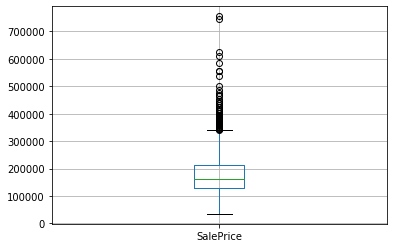

In [38]:
dt.boxplot(column='SalePrice')
plt.show()

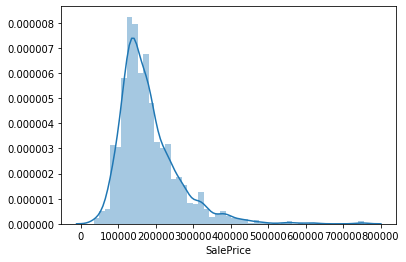

In [39]:
sns.distplot(dt['SalePrice'])

Since the target variable distribution is skewd we ned to transform it into normal distribution using log transformation

In [40]:
dt['SalePrice_log2'] = np.log2(dt['SalePrice'])

<function matplotlib.pyplot.show(*args, **kw)>

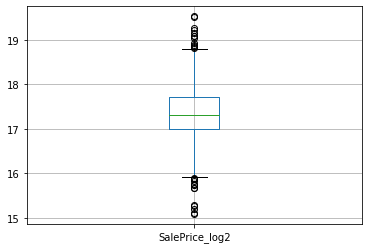

In [41]:
dt['SalePrice_log2'] = np.log2(dt['SalePrice'])
dt.boxplot(column='SalePrice_log2')
plt.show

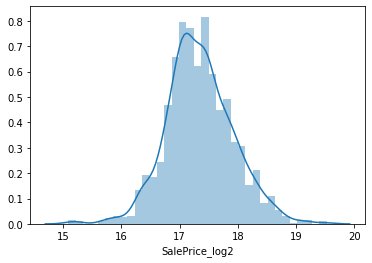

In [42]:
sns.distplot(dt['SalePrice_log2'])

In [43]:
dt['SalePrice_log10'] = np.log10(dt['SalePrice'])

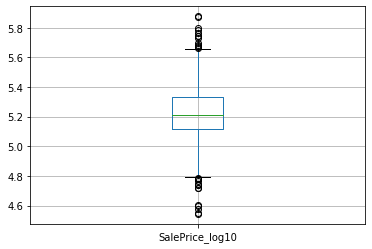

In [44]:
dt['SalePrice_log10'] = np.log10(dt['SalePrice'])
dt.boxplot(column='SalePrice_log10')

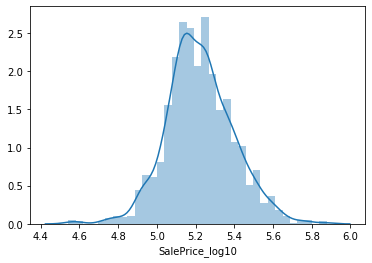

In [45]:
sns.distplot(dt['SalePrice_log10'])

In [46]:
dt.std(axis=0, skipna = True) 

Id                   421.610009
MSSubClass            42.300571
LotFrontage           22.024023
LotArea             9981.264932
LotShape               0.582296
LandContour            0.606509
Utilities              0.052342
LandSlope              0.276232
OverallQual            1.382997
OverallCond            1.112799
MasVnrArea           180.569112
ExterQual              0.574280
ExterCond              0.351054
BsmtQual               0.876478
BsmtCond               0.552159
BsmtExposure           1.067391
BsmtFinType1           2.107776
BsmtFinSF1           456.098091
BsmtFinType2           0.892332
BsmtFinSF2           161.319273
BsmtUnfSF            441.866955
TotalBsmtSF          438.705324
HeatingQC              0.959501
CentralAir             0.246731
1stFlrSF             386.587738
2ndFlrSF             436.528436
LowQualFinSF          48.623081
GrLivArea            525.480383
BsmtFullBath           0.518911
BsmtHalfBath           0.238753
FullBath               0.550916
HalfBath

In [47]:
dt['SalePrice_log2'].describe()

count    1460.000000
mean       17.347039
std         0.576287
min        15.090939
25%        16.987875
50%        17.314512
75%        17.707251
max        19.526117
Name: SalePrice_log2, dtype: float64

In [48]:
dt['SalePrice_log2'].std()

0.5762872294142128

In [49]:
dt['SalePrice_log10'].describe()

count    1460.000000
mean        5.221979
std         0.173480
min         4.542825
25%         5.113860
50%         5.212188
75%         5.330414
max         5.877947
Name: SalePrice_log10, dtype: float64

In [50]:
dt['SalePrice_log10'].std()

0.17347974217176843

In [51]:
dt['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [52]:
dt['SalePrice'].std()

79442.50288288663

In [53]:
dt.drop(['SalePrice_log2','SalePrice','Condition2'], inplace = True, axis = 1)

#### We have transformed the target variable using log 10 because it is distributed around mean normally and have low standard deviation

In [54]:
dt.shape

(1460, 76)

In [55]:
dt.head(10)

Id  MSSubClass                    MSZoning  LotFrontage  LotArea Street  \
0   1          60     Residential Low Density    65.000000     8450   Pave   
1   2          20     Residential Low Density    80.000000     9600   Pave   
2   3          60     Residential Low Density    68.000000    11250   Pave   
3   4          70     Residential Low Density    60.000000     9550   Pave   
4   5          60     Residential Low Density    84.000000    14260   Pave   
5   6          50     Residential Low Density    85.000000    14115   Pave   
6   7          20     Residential Low Density    75.000000    10084   Pave   
7   8          60     Residential Low Density    70.049958    10382   Pave   
8   9          50  Residential Medium Density    51.000000     6120   Pave   
9  10         190     Residential Low Density    50.000000     7420   Pave   

      Alley  LotShape  LandContour  Utilities LotConfig  LandSlope  \
0  No Alley         4            4          4    Inside          3   
1  No Alley         4            4          4       FR2          3   
2  No Alley         3            4          4    Inside          3   
3  No Alley         3            4          4    Corner          3   
4  No Alley         3            4          4       FR2          3   
5  No Alley         3            4          4    Inside          3   
6  No Alley         4            4          4    Inside          3   
7  No Alley         3            4          4    Corner          3   
8  No Alley         4            4          4    Inside          3   
9  No Alley         4            4          4    Corner          3   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   
5      Mitchel       Norm     1Fam     1.5Fin            5            5   
6      Somerst       Norm     1Fam     1Story            8            5   
7       NWAmes       PosN     1Fam     2Story            7            6   
8      OldTown     Artery     1Fam     1.5Fin            7            5   
9      BrkSide     Artery   2fmCon     1.5Unf            5            6   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
5     Gable  CompShg     VinylSd     VinylSd       None         0.0   
6     Gable  CompShg     VinylSd     VinylSd      Stone       186.0   
7     Gable  CompShg     HdBoard     HdBoard      Stone       240.0   
8     Gable  CompShg     BrkFace     Wd Shng       None         0.0   
9     Gable  CompShg     MetalSd     MetalSd       None         0.0   

   ExterQual  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          4          3      PConc         4         3             2   
1          3          3     CBlock         4         3             5   
2          4          3      PConc         4         3             3   
3          3          3     BrkTil         3         4             2   
4          4          3      PConc         4         3             4   
5          3          3       Wood         4         3             2   
6          4          3      PConc         5         3             4   
7          3          3     CBlock         4         3             3   
8          3          3     BrkTil         3         3             2   
9          3          3     BrkTil         3 

In [56]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id                 1460 non-null int64
MSSubClass         1460 non-null int64
MSZoning           1460 non-null object
LotFrontage        1460 non-null float64
LotArea            1460 non-null int64
Street             1460 non-null object
Alley              1460 non-null object
LotShape           1460 non-null int64
LandContour        1460 non-null int64
Utilities          1460 non-null int64
LotConfig          1460 non-null object
LandSlope          1460 non-null int64
Neighborhood       1460 non-null object
Condition1         1460 non-null object
BldgType           1460 non-null object
HouseStyle         1460 non-null object
OverallQual        1460 non-null int64
OverallCond        1460 non-null int64
RoofStyle          1460 non-null object
RoofMatl           1460 non-null object
Exterior1st        1460 non-null object
Exterior2nd        1460 non-null object
MasVnrType         14

In [57]:
num_col = dt._get_numeric_data().columns
cols = dt.columns
cat_col = list(set(cols) - set(num_col))
cat_col


['HouseStyle',
 'Heating',
 'SaleCondition',
 'Exterior2nd',
 'GarageType',
 'SaleType',
 'Exterior1st',
 'MasVnrType',
 'Street',
 'MSZoning',
 'Condition1',
 'RoofMatl',
 'Electrical',
 'BldgType',
 'Alley',
 'Foundation',
 'Neighborhood',
 'LotConfig',
 'RoofStyle',
 'MiscFeature']

### Creating the dummies for cateorical variables

In [58]:
dummies = pd.get_dummies(dt[['MiscFeature',
 'MasVnrType',
 'BldgType',
 'Street',
 'RoofMatl',
 'Alley',
 'Electrical',
 'LotConfig',
 'Foundation',
 'HouseStyle',
 'GarageType',
 'Neighborhood',
 'SaleCondition',
 'Condition1',
 'RoofStyle',
 'Exterior1st',
 'SaleType',
 'Exterior2nd',
 'Heating',
 'MSZoning']], drop_first=True)

In [59]:
dummies.head(15)

MiscFeature_None  MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  \
0                  1                 0                 0                 0   
1                  1                 0                 0                 0   
2                  1                 0                 0                 0   
3                  1                 0                 0                 0   
4                  1                 0                 0                 0   
5                  0                 0                 1                 0   
6                  1                 0                 0                 0   
7                  0                 0                 1                 0   
8                  1                 0                 0                 0   
9                  1                 0                 0                 0   
10                 1                 0                 0                 0   
11                 1                 0                 0                 0   
12                 1                 0                 0                 0   
13                 1                 0                 0                 0   
14                 1                 0                 0                 0   

    MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  BldgType_2fmCon  \
0                    1                0                 0                0   
1                    0                1                 0                0   
2                    1                0                 0                0   
3                    0                1                 0                0   
4                    1                0                 0                0   
5                    0                1                 0                0   
6                    0                0                 1                0   
7                    0                0                 1                0   
8                    0                1                 0                0   
9                    0                1                 0                1   
10                   0                1                 0                0   
11                   0                0                 1                0   
12                   0                1                 0                0   
13                   0                0                 1                0   
14                   1                0                 0                0   

    BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  Street_Pave  \
0                 0               0                0            1   
1                 0               0                0            1   
2                 0               0                0            1   
3                 0               0                0            1   
4                 0               0                0            1   
5                 0               0                0            1   
6                 0               0                0            1   
7                 0               0                0            1   
8                 0               0                0            1   
9                 0               0                0            1   
10                0               0                0            1   
11                0               0                0            1   
12                0               0                0            1   
13                0               0                0            1   
14                0               0                0            1   

    RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  \
0                  1                 0               0              0   
1                  1                 0               0              0   
2                  1                 0               0              0   
3                  1                 0               0              0   
4                  1                

In [60]:
dummies.shape

(1460, 136)

In [61]:
dt = pd.concat([dt,dummies], axis=1)

In [62]:
# dropping original columns after creating dummies

dt.drop(['MiscFeature',
 'MasVnrType',
 'BldgType',
 'Street',
 'RoofMatl',
 'Alley',
 'Electrical',
 'LotConfig',
 'Foundation',
 'HouseStyle',
 'GarageType',
 'Neighborhood',
 'SaleCondition',
 'Condition1',
 'RoofStyle',
 'Exterior1st',
 'SaleType',
 'Exterior2nd',
 'Heating',
 'MSZoning','Id'], axis=1, inplace=True)

In [63]:
dt.shape

(1460, 191)

### Dividing the data into test and train split

In [64]:
np.random.seed(0)
dt_train, dt_test = train_test_split(dt, train_size=0.7, test_size=0.3, random_state = 100)

In [65]:
# Scaling the numerical variables

scaler = MinMaxScaler()

num_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'age']
dt_train[num_features] = scaler.fit_transform(dt_train[num_features])

In [66]:
dt_train.head()

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  Utilities  \
210     0.058824     0.157534  0.019306       1.0          1.0        1.0   
318     0.235294     0.236301  0.039403       1.0          0.0        1.0   
239     0.176471     0.106164  0.033981       1.0          1.0        1.0   
986     0.176471     0.130137  0.017931       1.0          1.0        1.0   
1416    1.000000     0.133562  0.046139       1.0          1.0        1.0   

      LandSlope  OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  \
210         1.0     0.444444        0.625        0.00   0.333333   0.333333   
318         0.5     0.666667        0.500        0.16   0.666667   0.333333   
239         1.0     0.555556        0.375        0.00   0.333333   0.333333   
986         1.0     0.555556        0.875        0.00   0.333333   0.666667   
1416        1.0     0.333333        0.625        0.00   0.333333   0.333333   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
210        0.6      0.75          0.25      0.500000    0.082920   
318        0.8      0.75          1.00      1.000000    0.174876   
239        0.6      0.50          0.25      0.333333    0.016655   
986        0.6      0.50          0.25      0.166667    0.000000   
1416       0.6      0.75          0.25      0.166667    0.000000   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
210       0.166667         0.0   0.169521     0.141408       0.50         0.0   
318       0.166667         0.0   0.154110     0.220458       1.00         1.0   
239       0.166667         0.0   0.274401     0.120295       0.50         1.0   
986       0.166667         0.0   0.207620     0.079378       0.75         1.0   
1416      0.166667         0.0   0.332620     0.127169       0.75         1.0   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
210   0.113889  0.000000           0.0   0.081860      0.333333           0.0   
318   0.231481  0.616949           0.0   0.424289      0.333333           0.0   
239   0.098611  0.333656           0.0   0.201576      0.000000           0.0   
986   0.145602  0.307022           0.0   0.230015      0.000000           0.0   
1416  0.202315  0.505569           0.0   0.355880      0.000000           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
210   0.333333       0.0         0.250           0.0     0.333333   
318   0.666667       0.5         0.500           0.0     0.666667   
239   0.333333       0.5         0.375           0.0     0.333333   
986   0.333333       0.0         0.250           0.0     0.666667   
1416  0.666667       0.0         0.500           0.5     0.333333   

      TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageFinish  \
210       0.181818         1.0    0.000000          0.0      0.000000   
318       0.545455         1.0    0.333333          0.6      0.666667   
239       0.363636         1.0    0.333333          0.8      0.333333   
986       0.181818         1.0    0.000000          0.0      0.333333   
1416      0.727273         1.0    0.000000          0.0      0.333333   

      GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
210         0.00    0.000000         0.0         0.0         1.0    0.000000   
318         0.75    0.462623         0.6         0.6         1.0    0.396733   
239         0.25    0.155148         0.6         0.6         1.0    0.000000   
986         0.25    0.179831         0.4         0.6         1.0    0.459743   
1416        0.50    0.394922         0.6         0.6         0.0    0.000000   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
210      0.000000       0.173913        0.0          0.0       0.0     0.0   
318      0.114723       0.260870        0.0          0.0       0.0     0.0   
239      0.267686       0.000000        0.0          0.0       0.0     0.0   
986      0.000000       0.000000      

In [67]:
y_train = dt_train.pop('SalePrice_log10')
X_train = dt_train

## Creating the model using RFE with 25 variables

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [69]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 40),
 ('LotFrontage', False, 62),
 ('LotArea', True, 1),
 ('LotShape', False, 155),
 ('LandContour', False, 145),
 ('Utilities', False, 15),
 ('LandSlope', False, 141),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 116),
 ('ExterQual', False, 150),
 ('ExterCond', False, 130),
 ('BsmtQual', False, 129),
 ('BsmtCond', False, 107),
 ('BsmtExposure', False, 41),
 ('BsmtFinType1', False, 111),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 139),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 25),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 16),
 ('CentralAir', False, 46),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 31),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 9),
 ('BsmtHalfBath', False, 124),
 ('FullBath', False, 70),
 ('HalfBath', False, 73),
 ('BedroomAbvGr', False, 156),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 57),
 ('TotRmsAbvGrd', False, 3),
 ('Functional', True, 1),
 (

In [70]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'Functional',
       'GarageArea', 'age', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Neighborhood_BrDale',
       'Exterior1st_BrkComm', 'MSZoning_Floating Village Residential',
       'MSZoning_Residential High Density', 'MSZoning_Residential Low Density',
       'MSZoning_Residential Medium Density'],
      dtype='object')

In [71]:
# removing rest of the variables

removed_col = X_train.columns[~rfe.support_] # dropping rest of the columns

In [72]:
X_train_rfe = X_train[col]

In [73]:
# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

In [74]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [75]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        SalePrice_log10   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     342.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):               0.00
Time:                        23:21:13   Log-Likelihood:                 1502.6
No. Observations:                1021   AIC:                            -2953.
Df Residuals:                     995   BIC:                            -2825.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     3.2068      0.071     44.939      0.000       3.067       3.347
LotArea                                   0.1967      0.040      4.866      0.000       0.117       0.276
OverallQual                               0.3087      0.019     15.848      0.000       0.271       0.347
OverallCond                               0.1575      0.015     10.475      0.000       0.128       0.187
BsmtFinSF1                                0.2029      0.027      7.622      0.000       0.151       0.255
TotalBsmtSF                               0.2618      0.048      5.411      0.000       0.167       0.357
1stFlrSF                                  0.1934      0.169      1.147      0.252      -0.137       0.524
2ndFlrSF                                  0.0640      0.080      0.804      0.422      -0.092       0.220
GrLivArea                                 0.4719      0.198      2.385      0.017       0.084       0.860
KitchenAbvGr                             -0.0944      0.017     -5.407      0.000      -0.129      -0.060
Functional                                0.0826      0.018      4.614      0.000       0.047       0.118
GarageArea                                0.1360      0.016      8.594      0.000       0.105       0.167
age                                      -0.1772      0.013    -14.048      0.000      -0.202      -0.152
RoofMatl_CompShg                          1.2924      0.064     20.352      0.000       1.168       1.417
RoofMatl_Membran                          1.4334      0.086     16.714      0.000       1.265       1.602
RoofMatl_Metal                            1.3698      0.085     16.116      0.000       1.203       1.537
RoofMatl_Roll                             1.2962      0.085     15.221      0.000       1.129       1.463
RoofMatl_Tar&Grv                          1.3295      0.068     19.629      0.000       1.197       1.462
RoofMatl_WdShake                          1.2530      0.069     18.055      0.000       1.117       1.389
RoofMatl_WdShngl                          1.3236      0.068     19.408      0.000       1.190       1.457
Neighborhood_BrDale                      -0.0730      0.017     -4.227      0.000      -0.107      -0.039
Exterior1st_BrkComm                      -0.1465      0.042     -3.484      0.001      -0.229      -0.064
MSZoning_Floating Village Residential     0.1876      0.024      7.866      0.000       0.141       0.234
MSZoning_Residential High Density         0.1711      0.027      6.396      0.000       0.119       0.224
MSZoning_Residential Low Density          0.1769      0.022      8.019      0.000       0.134       0.220
MSZoning_Residential Medium Density       0.1477      0.022      6.619      0.000       0.104       0.192
=========

In [76]:
X_train_rfe.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr',
       'Functional', 'GarageArea', 'age', 'RoofMatl_CompShg',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Neighborhood_BrDale', 'Exterior1st_BrkComm',
       'MSZoning_Floating Village Residential',
       'MSZoning_Residential High Density', 'MSZoning_Residential Low Density',
       'MSZoning_Residential Medium Density'],
      dtype='object')

## Ridge Regression

Performing Ridge regression with a range of alpha using cross validation

In [77]:
# list of alphas to tune
params = {'alpha': [0.00000001, 0.000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 
             0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
             4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]} 


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 1e-06, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [78]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=10]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013871      0.003945         0.006810        0.002196       1e-08   
1       0.006858      0.001882         0.003976        0.001093       1e-06   
2       0.005432      0.001018         0.003428        0.000445      0.0001   
3       0.005392      0.000508         0.002661        0.000506       0.001   
4       0.004007      0.000851         0.002751        0.001457        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}          -0.037895          -0.045709          -0.042106   
1   {'alpha': 1e-06}          -0.037895          -0.045709          -0.042106   
2  {'alpha': 0.0001}          -0.037898          -0.045709          -0.042105   
3   {'alpha': 0.001}          -0.037926          -0.045708          -0.042098   
4    {'alpha': 0.01}          -0.038173          -0.045700          -0.042071   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.042572          -0.037936        -0.041244        0.002987   
1          -0.042572          -0.037936        -0.041244        0.002987   
2          -0.042568          -0.037938        -0.041244        0.002985   
3          -0.042538          -0.037958        -0.041246        0.002971   
4          -0.042256          -0.038221        -0.041284        0.002833   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.037671           -0.037477   
1                2           -0.037671           -0.037477   
2                3           -0.037674           -0.037476   
3                4           -0.037703           -0.037473   
4                5           -0.037990           -0.037447   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.036147           -0.037999           -0.037729   
1           -0.036147           -0.037999           -0.037729   
2           -0.036149           -0.038002           -0.037732   
3           -0.036162           -0.038025           -0.037760   
4           -0.036298           -0.038258           -0.038047   

   mean_train_score  std_train_score  
0         -0.037405         0.000651  
1         -0.037405         0.000651  
2         -0.037407         0.000651  
3         -0.037425         0.000655  
4         -0.037608         0.000708

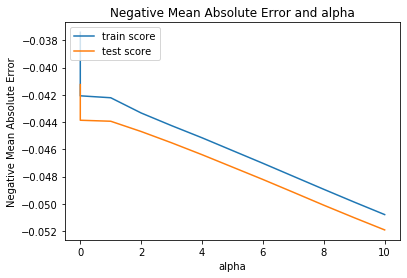

In [79]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [80]:
# determining the best value of alpha for Ridge regression

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1e-08}
-0.04124356350670394


## Lasso Regression

Performing Lasso regression using cross validation with a range of alpha

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    3.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-08, 1e-06, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                                   20, 50, 100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.033630      0.008168         0.004452        0.001016       1e-08   
1       0.019281      0.006091         0.003472        0.001139       1e-06   
2       0.016135      0.003037         0.004642        0.000732      0.0001   
3       0.008390      0.001355         0.004478        0.001075       0.001   
4       0.005586      0.001825         0.003572        0.000981        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-08}          -0.037895          -0.045691          -0.042105   
1   {'alpha': 1e-06}          -0.037902          -0.045765          -0.042109   
2  {'alpha': 0.0001}          -0.041205          -0.045858          -0.044187   
3   {'alpha': 0.001}          -0.047540          -0.052514          -0.052128   
4    {'alpha': 0.01}          -0.085214          -0.088046          -0.086402   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.042572          -0.037935        -0.041240        0.002981   
1          -0.042546          -0.037957        -0.041256        0.002995   
2          -0.041348          -0.043302        -0.043180        0.001758   
3          -0.048202          -0.050361        -0.050149        0.002007   
4          -0.080160          -0.091943        -0.086353        0.003841   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.037671           -0.037476   
1                2           -0.037697           -0.037477   
2                3           -0.041516           -0.037900   
3                4           -0.051130           -0.044175   
4                5           -0.085792           -0.085140   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.036147           -0.037999           -0.037729   
1           -0.036155           -0.038019           -0.037751   
2           -0.038997           -0.041312           -0.041678   
3           -0.048712           -0.050858           -0.050659   
4           -0.085085           -0.086535           -0.086199   

   mean_train_score  std_train_score  
0         -0.037405         0.000651  
1         -0.037420         0.000655  
2         -0.040281         0.001540  
3         -0.049107         0.002609  
4         -0.085750         0.000572

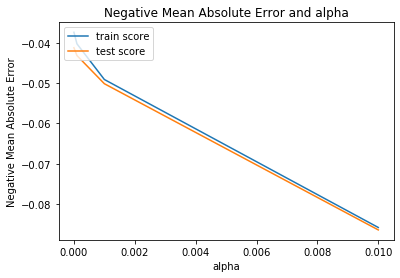

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [84]:
# determining the best value of alpha for Lasso regression

print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 1e-08}
-0.04123958563239685


### Creating the test data set

In [85]:
dt_test[num_features] = scaler.transform(dt_test[num_features])

In [86]:
dt_test.head(10)

MSSubClass  LotFrontage   LotArea  LotShape  LandContour  Utilities  \
1436    0.000000     0.133562  0.035192  1.000000          1.0        1.0   
57      0.235294     0.232877  0.047566  0.666667          1.0        1.0   
780     0.000000     0.143836  0.029930  1.000000          1.0        1.0   
382     0.235294     0.198630  0.036338  0.666667          1.0        1.0   
1170    0.352941     0.188356  0.039309  1.000000          1.0        1.0   
726     0.000000     0.167979  0.094579  0.666667          1.0        1.0   
258     0.235294     0.202055  0.051261  1.000000          1.0        1.0   
888     0.000000     0.253425  0.067307  0.666667          1.0        1.0   
532     0.000000     0.133562  0.026772  1.000000          1.0        1.0   
1055    0.000000     0.284247  0.046237  1.000000          1.0        1.0   

      LandSlope  OverallQual  OverallCond  MasVnrArea  ExterQual  ExterCond  \
1436        1.0     0.333333        0.625     0.00000   0.333333   0.333333   
57          1.0     0.666667        0.500     0.00000   0.666667   0.333333   
780         1.0     0.666667        0.500     0.02375   0.333333   0.333333   
382         1.0     0.666667        0.500     0.00000   0.666667   0.333333   
1170        1.0     0.555556        0.625     0.00000   0.333333   0.333333   
726         1.0     0.555556        1.000     0.16250   0.666667   0.666667   
258         1.0     0.666667        0.500     0.10750   0.666667   0.333333   
888         0.5     0.777778        0.625     0.00000   0.666667   0.666667   
532         1.0     0.444444        0.750     0.00000   0.333333   0.333333   
1055        1.0     0.555556        0.500     0.10000   0.333333   0.333333   

      BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
1436       0.6      0.75          0.25      0.833333    0.109142   
57         0.8      0.75          0.25      0.166667    0.000000   
780        0.8      1.00          0.25      0.166667    0.000000   
382        0.8      0.75          0.75      0.166667    0.000000   
1170       0.6      0.75          0.75      0.833333    0.092488   
726        0.8      0.75          0.25      1.000000    0.143161   
258        0.8      0.75          0.25      1.000000    0.063962   
888        0.6      1.00          1.00      0.833333    0.062190   
532        0.0      0.00          0.00      0.000000    0.000000   
1055       0.8      0.75          0.25      0.833333    0.114103   

      BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
1436      0.166667    0.000000   0.106164     0.141408       0.50         1.0   
57        0.166667    0.000000   0.368151     0.140753       1.00         1.0   
780       0.166667    0.000000   0.529538     0.202455       0.75         1.0   
382       0.166667    0.000000   0.401969     0.153682       1.00         1.0   
1170      0.166667    0.000000   0.245719     0.179378       0.50         1.0   
726       0.166667    0.000000   0.030822     0.144026       1.00         1.0   
258       0.166667    0.000000   0.257705     0.157610       1.00         1.0   
888       0.500000    0.558345   0.446490     0.362848       1.00         1.0   
532       0.000000    0.000000   0.000000     0.000000       1.00         1.0   
1055      0.166667    0.000000   0.235017     0.195254       0.50         1.0   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1436  0.113889  0.000000           0.0   0.081860      0.000000           0.0   
57    0.112963  0.416465           0.0   0.246349      0.000000           0.0   
780   0.203935  0.000000           0.0   0.156610      0.000000           0.0   
382   0.131250  0.415496           0.0   0.261145      0.000000           0.0   
1170  0.172685  0.000000           0.0   0.130669      0.333333           0.0   
726   0.302778  0.000000           0.0   0.238663      0.333333           0.0   
258   0.136806  0.401453           0.0   0.260184      0.000000           0.0   

In [87]:
y_test = dt_test.pop('SalePrice_log10')
X_test = dt_test

In [88]:
X_test_m = X_test.drop(removed_col, axis=1, inplace =True)

In [89]:
X_test_m = sm.add_constant(X_test)

In [90]:
X_test_m

const   LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  \
1436    1.0  0.035192     0.333333        0.625    0.109142     0.141408   
57      1.0  0.047566     0.666667        0.500    0.000000     0.140753   
780     1.0  0.029930     0.666667        0.500    0.000000     0.202455   
382     1.0  0.036338     0.666667        0.500    0.000000     0.153682   
1170    1.0  0.039309     0.555556        0.625    0.092488     0.179378   
726     1.0  0.094579     0.555556        1.000    0.143161     0.144026   
258     1.0  0.051261     0.666667        0.500    0.063962     0.157610   
888     1.0  0.067307     0.777778        0.625    0.062190     0.362848   
532     1.0  0.026772     0.444444        0.750    0.000000     0.000000   
1055    1.0  0.046237     0.555556        0.500    0.114103     0.195254   
1246    1.0  0.031099     0.666667        0.500    0.000000     0.123732   
191     1.0  0.028044     0.666667        1.000    0.110914     0.118658   
1222    1.0  0.042191     0.555556        0.625    0.034727     0.170213   
588     1.0  0.110484     0.444444        0.875    0.234585     0.235188   
773     1.0  0.040572     0.444444        0.500    0.080794     0.149264   
1453    1.0  0.073631     0.444444        0.500    0.000000     0.186579   
742     1.0  0.032619     0.666667        0.500    0.000000     0.220786   
431     1.0  0.019222     0.555556        0.750    0.000000     0.147463   
207     1.0  0.051533     0.333333        0.500    0.074238     0.180033   
571     1.0  0.027390     0.555556        0.625    0.073352     0.141408   
1263    1.0  0.056313     0.555556        0.625    0.000000     0.125041   
1215    1.0  0.026276     0.444444        0.500    0.031892     0.146318   
330     1.0  0.042789     0.444444        0.375    0.007087     0.282815   
170     1.0  0.050901     0.444444        0.625    0.063785     0.117840   
1188    1.0  0.034888     0.666667        0.500    0.000000     0.136007   
741     1.0  0.024751     0.555556        0.875    0.147413     0.149264   
533     1.0  0.016480     0.000000        0.250    0.000000     0.000000   
896     1.0  0.034093     0.333333        0.625    0.050496     0.155646   
689     1.0  0.028536     0.555556        0.500    0.003544     0.222913   
1308    1.0  0.049226     0.444444        0.750    0.025514     0.151227   
901     1.0  0.033845     0.444444        0.750    0.152374     0.162357   
851     1.0  0.008041     0.777778        0.500    0.000000     0.208347   
1354    1.0  0.041349     0.666667        0.500    0.130227     0.162357   
976     1.0  0.020691     0.333333        0.750    0.000000     0.072013   
1025    1.0  0.029111     0.444444        0.500    0.024451     0.144354   
1035    1.0  0.046887     0.333333        0.250    0.000000     0.000000   
12      1.0  0.053755     0.444444        0.625    0.130581     0.149264   
250     1.0  0.018118     0.222222        0.125    0.000000     0.119149   
1130    1.0  0.029598     0.333333        0.250    0.110206     0.183633   
116     1.0  0.047430     0.444444        0.500    0.030120     0.178723   
336     1.0  0.059317     0.888889        0.500    0.221297     0.314566   
216     1.0  0.032619     0.666667        0.500    0.167612     0.235025   
1292    1.0  0.023965     0.444444        0.375    0.000000     0.162684   
30      1.0  0.032853     0.333333        0.375    0.000000     0.106219   
842     1.0  0.035286     0.555556        0.750    0.055280     0.184452   
968     1.0  0.020808     0.222222        0.625    0.000000     0.098200   
1386    1.0  0.071175     0.666667        0.500    0.139972     0.227823   
634     1.0  0.025738     0.555556        0.500    0.187101     0.172831   
838     1.0  0.037648     0.444444        0.625    0.000000     0.179869   
402     1.0  0.040806     0.444444        0.875    0.000000     0.109984   
1456    1.0  0.054723     0.555556        0.625    0.139972     0.252373   
268     1.0  0.025369     0.444444        0.625    0.0

## Model with optimal alpha using Lasso

In [91]:
# model with optimal alpha
# lasso regression
lm = Lasso(alpha=1e-08)
lm.fit(X_train_rfe, y_train)

# predict
y_train_pred = lm.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test_m)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8959605190860885
0.8808447786793763


In [92]:
# lasso model parameters
model_parameters = list(lm.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 3.207),
 ('const', 0.0),
 ('LotArea', 0.197),
 ('OverallQual', 0.309),
 ('OverallCond', 0.158),
 ('BsmtFinSF1', 0.203),
 ('TotalBsmtSF', 0.262),
 ('1stFlrSF', 0.194),
 ('2ndFlrSF', 0.064),
 ('GrLivArea', 0.471),
 ('KitchenAbvGr', -0.094),
 ('Functional', 0.083),
 ('GarageArea', 0.136),
 ('age', -0.177),
 ('RoofMatl_CompShg', 1.292),
 ('RoofMatl_Membran', 1.433),
 ('RoofMatl_Metal', 1.37),
 ('RoofMatl_Roll', 1.296),
 ('RoofMatl_Tar&Grv', 1.329),
 ('RoofMatl_WdShake', 1.253),
 ('RoofMatl_WdShngl', 1.324),
 ('Neighborhood_BrDale', -0.073),
 ('Exterior1st_BrkComm', -0.147),
 ('MSZoning_Floating Village Residential', 0.188),
 ('MSZoning_Residential High Density', 0.171),
 ('MSZoning_Residential Low Density', 0.177),
 ('MSZoning_Residential Medium Density', 0.148)]

In [93]:
# model coefficients
cols = X_train_rfe.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 3.207),
 ('const', 0.0),
 ('LotArea', 0.197),
 ('OverallQual', 0.309),
 ('OverallCond', 0.158),
 ('BsmtFinSF1', 0.203),
 ('TotalBsmtSF', 0.262),
 ('1stFlrSF', 0.194),
 ('2ndFlrSF', 0.064),
 ('GrLivArea', 0.471),
 ('KitchenAbvGr', -0.094),
 ('Functional', 0.083),
 ('GarageArea', 0.136),
 ('age', -0.177),
 ('RoofMatl_CompShg', 1.292),
 ('RoofMatl_Membran', 1.433),
 ('RoofMatl_Metal', 1.37),
 ('RoofMatl_Roll', 1.296),
 ('RoofMatl_Tar&Grv', 1.329),
 ('RoofMatl_WdShake', 1.253),
 ('RoofMatl_WdShngl', 1.324),
 ('Neighborhood_BrDale', -0.073),
 ('Exterior1st_BrkComm', -0.147),
 ('MSZoning_Floating Village Residential', 0.188),
 ('MSZoning_Residential High Density', 0.171),
 ('MSZoning_Residential Low Density', 0.177),
 ('MSZoning_Residential Medium Density', 0.148)]

In [94]:
#print(lm.best_params_)
#print(lm.best_score_)

## Model with optimal alpha using Ridge

In [95]:
# model with optimal alpha
# Ridge regression
ridge_mod = Ridge(alpha=1e-08)
ridge_mod.fit(X_train_rfe, y_train)

# predict
y_train_pred = ridge_mod.predict(X_train_rfe)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge_mod.predict(X_test_m)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8959605199625816
0.8808444005712145


In [96]:
model_parameters_ridge = list(ridge_mod.coef_)
model_parameters_ridge.insert(0, ridge_mod.intercept_)
model_parameters_ridge = [np.round(x, 3) for x in model_parameters_ridge]
ridge_cols = X_train_rfe.columns
ridge_cols = cols.insert(0, "constant")
list(zip(ridge_cols, model_parameters))

[('constant', 3.207),
 ('constant', 0.0),
 ('const', 0.197),
 ('LotArea', 0.309),
 ('OverallQual', 0.158),
 ('OverallCond', 0.203),
 ('BsmtFinSF1', 0.262),
 ('TotalBsmtSF', 0.194),
 ('1stFlrSF', 0.064),
 ('2ndFlrSF', 0.471),
 ('GrLivArea', -0.094),
 ('KitchenAbvGr', 0.083),
 ('Functional', 0.136),
 ('GarageArea', -0.177),
 ('age', 1.292),
 ('RoofMatl_CompShg', 1.433),
 ('RoofMatl_Membran', 1.37),
 ('RoofMatl_Metal', 1.296),
 ('RoofMatl_Roll', 1.329),
 ('RoofMatl_Tar&Grv', 1.253),
 ('RoofMatl_WdShake', 1.324),
 ('RoofMatl_WdShngl', -0.073),
 ('Neighborhood_BrDale', -0.147),
 ('Exterior1st_BrkComm', 0.188),
 ('MSZoning_Floating Village Residential', 0.171),
 ('MSZoning_Residential High Density', 0.177),
 ('MSZoning_Residential Low Density', 0.148)]

### In Lasso Regression, the significant variables are 

RoofMatl_CompShg,
RoofMatl_Membran,
RoofMatl_Metal,
RoofMatl_Roll,
RoofMatl_Tar&Grv,
RoofMatl_WdShake,
RoofMatl_WdShngl


### In Ridge Regression, the significant variables are

RoofMatl_CompShg,
RoofMatl_Membran,
RoofMatl_Metal,
RoofMatl_Roll,
RoofMatl_Tar&Grv,
'RoofMatl_WdShake

## Subjective question 3

##### Deleting the five most important predictor variables in the LASSO model are not available in the incoming data and creating a new model

In [97]:
X_train_rfe_new = X_train_rfe.drop(['RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Tar&Grv', 'RoofMatl_WdShngl'], axis=1)


In [98]:
X_train_rfe_new

const   LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  \
210     1.0  0.019306     0.444444        0.625    0.082920     0.141408   
318     1.0  0.039403     0.666667        0.500    0.174876     0.220458   
239     1.0  0.033981     0.555556        0.375    0.016655     0.120295   
986     1.0  0.017931     0.555556        0.875    0.000000     0.079378   
1416    1.0  0.046139     0.333333        0.625    0.000000     0.127169   
390     1.0  0.032409     0.444444        0.875    0.042700     0.140917   
1005    1.0  0.032315     0.444444        0.875    0.105422     0.161211   
568     1.0  0.050756     0.777778        0.875    0.255315     0.244845   
342     1.0  0.033059     0.222222        0.375    0.000000     0.000000   
114     1.0  0.027048     0.555556        0.875    0.137137     0.168249   
499     1.0  0.028339     0.444444        0.750    0.019667     0.149264   
365     1.0  0.043098     0.444444        0.750    0.080794     0.109984   
308     1.0  0.050826     0.333333        0.500    0.046421     0.140917   
797     1.0  0.029003     0.444444        0.500    0.100992     0.126514   
703     1.0  0.028784     0.444444        1.000    0.000000     0.058920   
858     1.0  0.041742     0.666667        0.500    0.000000     0.178396   
25      1.0  0.059658     0.777778        0.500    0.000000     0.256301   
88      1.0  0.032713     0.222222        0.125    0.000000     0.165794   
1129    1.0  0.026772     0.444444        0.500    0.165840     0.153191   
1425    1.0  0.043243     0.555556        0.625    0.000000     0.204910   
728     1.0  0.046770     0.444444        0.500    0.000000     0.259247   
883     1.0  0.022113     0.333333        0.500    0.000000     0.130115   
606     1.0  0.051397     0.444444        0.500    0.129695     0.170213   
1183    1.0  0.043613     0.444444        0.625    0.145464     0.183306   
808     1.0  0.055775     0.444444        0.500    0.091425     0.167594   
452     1.0  0.036610     0.555556        0.500    0.131467     0.142717   
1395    1.0  0.052337     0.777778        0.500    0.000000     0.179051   
1078    1.0  0.013837     0.555556        0.500    0.117293     0.138789   
146     1.0  0.021720     0.444444        0.750    0.037030     0.117021   
906     1.0  0.056248     0.777778        0.500    0.011162     0.265630   
614     1.0  0.000065     0.333333        0.625    0.026577     0.103110   
405     1.0  0.039828     0.333333        0.375    0.197732     0.209656   
45      1.0  0.028915     0.888889        0.500    0.080794     0.286743   
1443    1.0  0.034509     0.555556        0.625    0.000000     0.155810   
1241    1.0  0.039164     0.666667        0.625    0.000000     0.276432   
537     1.0  0.052665     0.333333        0.500    0.106308     0.141408   
454     1.0  0.036582     0.444444        0.500    0.284550     0.282815   
160     1.0  0.045110     0.555556        0.625    0.116938     0.201637   
1433    1.0  0.041091     0.555556        0.500    0.000000     0.153191   
1037    1.0  0.036315     0.777778        0.500    0.000000     0.172668   
106     1.0  0.043613     0.333333        0.750    0.000000     0.104910   
1307    1.0  0.030851     0.444444        0.500    0.132176     0.162029   
876     1.0  0.111378     0.333333        0.500    0.112155     0.174141   
771     1.0  0.034617     0.333333        0.500    0.148122     0.136825   
890     1.0  0.030814     0.444444        0.750    0.000000     0.109984   
420     1.0  0.026117     0.666667        0.500    0.231928     0.219967   
1446    1.0  0.115382     0.444444        0.750    0.105067     0.194435   
1315    1.0  0.044899     0.555556        0.500    0.088590     0.155810   
384     1.0  0.241524     0.555556        0.500    0.174522     0.258592   
1047    1.0  0.036338     0.444444        0.500    0.121545     0.162029   
1333    1.0  0.026772     0.444444        0.625    0.000000     0.131424   
1337    1.0  0.012355     0.333333        0.375    0.0

In [99]:
X_test_new = X_test_m.drop(['RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Tar&Grv','RoofMatl_WdShngl'], axis=1)


In [100]:
X_test_new

const   LotArea  OverallQual  OverallCond  BsmtFinSF1  TotalBsmtSF  \
1436    1.0  0.035192     0.333333        0.625    0.109142     0.141408   
57      1.0  0.047566     0.666667        0.500    0.000000     0.140753   
780     1.0  0.029930     0.666667        0.500    0.000000     0.202455   
382     1.0  0.036338     0.666667        0.500    0.000000     0.153682   
1170    1.0  0.039309     0.555556        0.625    0.092488     0.179378   
726     1.0  0.094579     0.555556        1.000    0.143161     0.144026   
258     1.0  0.051261     0.666667        0.500    0.063962     0.157610   
888     1.0  0.067307     0.777778        0.625    0.062190     0.362848   
532     1.0  0.026772     0.444444        0.750    0.000000     0.000000   
1055    1.0  0.046237     0.555556        0.500    0.114103     0.195254   
1246    1.0  0.031099     0.666667        0.500    0.000000     0.123732   
191     1.0  0.028044     0.666667        1.000    0.110914     0.118658   
1222    1.0  0.042191     0.555556        0.625    0.034727     0.170213   
588     1.0  0.110484     0.444444        0.875    0.234585     0.235188   
773     1.0  0.040572     0.444444        0.500    0.080794     0.149264   
1453    1.0  0.073631     0.444444        0.500    0.000000     0.186579   
742     1.0  0.032619     0.666667        0.500    0.000000     0.220786   
431     1.0  0.019222     0.555556        0.750    0.000000     0.147463   
207     1.0  0.051533     0.333333        0.500    0.074238     0.180033   
571     1.0  0.027390     0.555556        0.625    0.073352     0.141408   
1263    1.0  0.056313     0.555556        0.625    0.000000     0.125041   
1215    1.0  0.026276     0.444444        0.500    0.031892     0.146318   
330     1.0  0.042789     0.444444        0.375    0.007087     0.282815   
170     1.0  0.050901     0.444444        0.625    0.063785     0.117840   
1188    1.0  0.034888     0.666667        0.500    0.000000     0.136007   
741     1.0  0.024751     0.555556        0.875    0.147413     0.149264   
533     1.0  0.016480     0.000000        0.250    0.000000     0.000000   
896     1.0  0.034093     0.333333        0.625    0.050496     0.155646   
689     1.0  0.028536     0.555556        0.500    0.003544     0.222913   
1308    1.0  0.049226     0.444444        0.750    0.025514     0.151227   
901     1.0  0.033845     0.444444        0.750    0.152374     0.162357   
851     1.0  0.008041     0.777778        0.500    0.000000     0.208347   
1354    1.0  0.041349     0.666667        0.500    0.130227     0.162357   
976     1.0  0.020691     0.333333        0.750    0.000000     0.072013   
1025    1.0  0.029111     0.444444        0.500    0.024451     0.144354   
1035    1.0  0.046887     0.333333        0.250    0.000000     0.000000   
12      1.0  0.053755     0.444444        0.625    0.130581     0.149264   
250     1.0  0.018118     0.222222        0.125    0.000000     0.119149   
1130    1.0  0.029598     0.333333        0.250    0.110206     0.183633   
116     1.0  0.047430     0.444444        0.500    0.030120     0.178723   
336     1.0  0.059317     0.888889        0.500    0.221297     0.314566   
216     1.0  0.032619     0.666667        0.500    0.167612     0.235025   
1292    1.0  0.023965     0.444444        0.375    0.000000     0.162684   
30      1.0  0.032853     0.333333        0.375    0.000000     0.106219   
842     1.0  0.035286     0.555556        0.750    0.055280     0.184452   
968     1.0  0.020808     0.222222        0.625    0.000000     0.098200   
1386    1.0  0.071175     0.666667        0.500    0.139972     0.227823   
634     1.0  0.025738     0.555556        0.500    0.187101     0.172831   
838     1.0  0.037648     0.444444        0.625    0.000000     0.179869   
402     1.0  0.040806     0.444444        0.875    0.000000     0.109984   
1456    1.0  0.054723     0.555556        0.625    0.139972     0.252373   
268     1.0  0.025369     0.444444        0.625    0.0

In [101]:
# model with optimal alpha
# lasso regression
lm2 = Lasso(alpha=1e-08)
lm2.fit(X_train_rfe_new, y_train)

# predict
y_train_pred = lm2.predict(X_train_rfe_new)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm2.predict(X_test_new)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8510427486335774
0.8715717287598514


In [102]:
# lasso model parameters after deleting top columns
model_parameters2 = list(lm2.coef_)
model_parameters2.insert(0, lm2.intercept_)
model_parameters2 = [round(x, 3) for x in model_parameters2]
cols1 = X_train_rfe_new.columns
cols1 = cols1.insert(0, "constant")
list(zip(cols1, model_parameters))

[('constant', 3.207),
 ('const', 0.0),
 ('LotArea', 0.197),
 ('OverallQual', 0.309),
 ('OverallCond', 0.158),
 ('BsmtFinSF1', 0.203),
 ('TotalBsmtSF', 0.262),
 ('1stFlrSF', 0.194),
 ('2ndFlrSF', 0.064),
 ('GrLivArea', 0.471),
 ('KitchenAbvGr', -0.094),
 ('Functional', 0.083),
 ('GarageArea', 0.136),
 ('age', -0.177),
 ('RoofMatl_Roll', 1.292),
 ('RoofMatl_WdShake', 1.433),
 ('Neighborhood_BrDale', 1.37),
 ('Exterior1st_BrkComm', 1.296),
 ('MSZoning_Floating Village Residential', 1.329),
 ('MSZoning_Residential High Density', 1.253),
 ('MSZoning_Residential Low Density', 1.324),
 ('MSZoning_Residential Medium Density', -0.073)]